In [2]:
import numpy as np
%matplotlib inline

import utils
import plotter
import bao_utils
from colors_labels import *

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 200
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (4, 2),
         'axes.labelsize': 'xx-large',
         'axes.titlesize': 'x-large',
         'xtick.labelsize': 'x-large',
         'ytick.labelsize': 'x-large',
         'figure.autolayout': True,
         'text.usetex': True,
         'text.latex.preamble': [r"\usepackage{bm}"]}
pylab.rcParams.update(params)

In [3]:
plot_dir = '../plots/plots_2020-10-13'

In [4]:
cosmo_b17 = bao_utils.get_cosmo('b17')
cosmo_patchy = bao_utils.get_cosmo('patchy')

z = 0.57
alpha_true = bao_utils.compute_alpha(z, cosmo_patchy, cosmo_b17)

0.260448 0.31000013381653335 0.04814257203879415 0.676 0.96 [0.06] 0.824 2.0328
0.258909 0.307115 0.048206 0.6777 0.9611 [] 0.8288000000000002 3.046
Truth: r_s: 151.67742739223243 D_A: 1386.2717028870238 Mpc H: 92.96723916119726 km / (Mpc s)
Fiducial: r_s: 151.63251902228856 D_A: 1388.2262919973946 Mpc H: 92.93687764109468 km / (Mpc s)
alpha: 0.998656590432877


In [5]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))

776 1.5351744197464345
Found 1000 converged BAO cfs (0 not converged)
alpha_mean: 0.9946063851940992
alpha_median: 0.9974599364423472
alpha_std: 0.04250878462044446
0.9946063851940992 0.9974599364423472 0.04250878462044446


In [6]:
print(np.sum(np.isnan(alphas)))

0


In [9]:
med = np.median(alphas)
std = np.std(alphas)
p16 = np.percentile(alphas, 16)
p84 = np.percentile(alphas, 84)
print(med)
print(std)
print(p16, p84)
print(med-p16, p84-med)
print(0.5*((med-p16) + (p84-med)))


0.9974599364423472
0.04250878462044446
0.967570639119583 1.0255498557096183
0.02988929732276424 0.028089919267271113
0.028989608295017677


Text(0, 0.5, 'count')

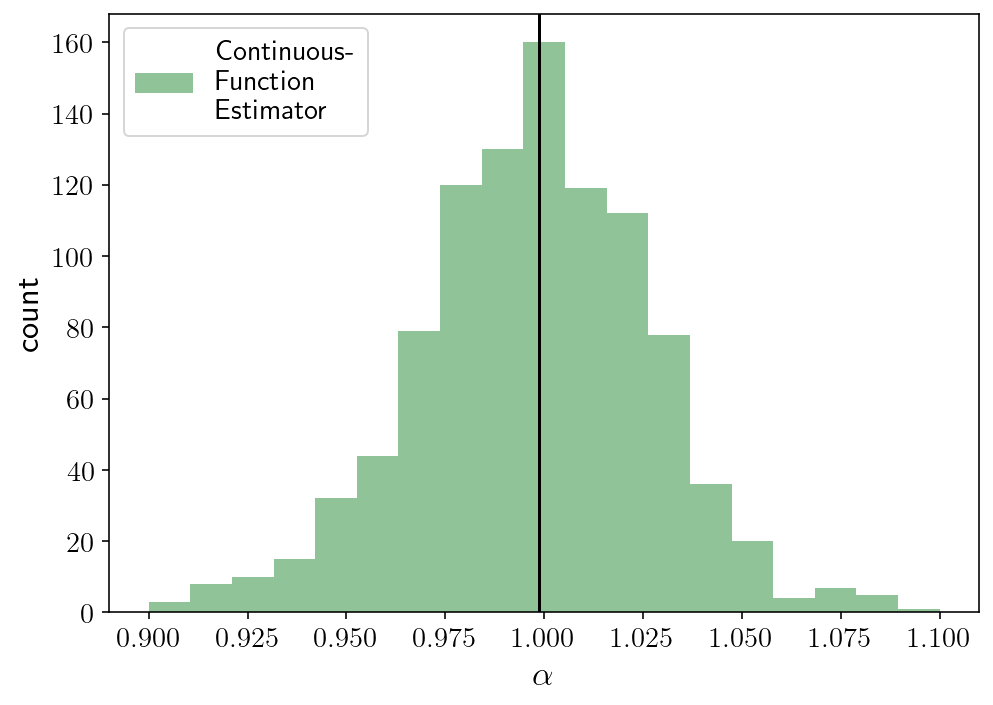

In [8]:
#bins = np.linspace(0.6, 1.4, 30)
bins = np.linspace(0.9, 1.1, 20)
plt.figure(figsize=(7,5))
plt.hist(alphas, bins=bins, color=cbao, alpha=0.5, label='Continuous-\nFunction\nEstimator')
#plt.hist(alphas_standard, bins=bins, color=ctheory, alpha=0.5, label='L-S with\nStandard\nBAO Fitting')
plt.axvline(alpha_true, color='black')
plt.legend(loc='upper left')
plt.xlabel(r"$\alpha$")
plt.ylabel('count')

Text(0, 0.5, 'count')

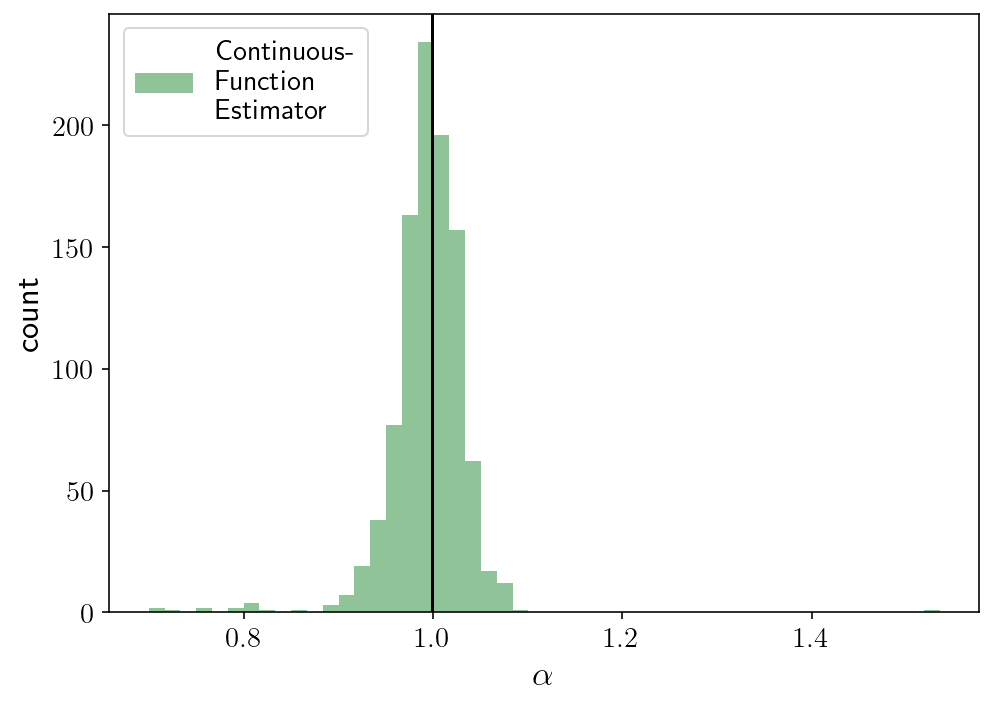

In [9]:
#bins = np.linspace(0.6, 1.4, 30)
#bins = np.linspace(0.9, 1.1, 20)
bins = 50
plt.figure(figsize=(7,5))
plt.hist(alphas, bins=bins, color=cbao, alpha=0.5, label='Continuous-\nFunction\nEstimator')
#plt.hist(alphas_standard, bins=bins, color=ctheory, alpha=0.5, label='L-S with\nStandard\nBAO Fitting')
plt.axvline(alpha_true, color='black')
plt.legend(loc='upper left')
plt.xlabel(r"$\alpha$")
plt.ylabel('count')